In [7]:
    conda install -c conda-forge librosa

SyntaxError: invalid syntax (<ipython-input-7-3d6a6fbc0bb4>, line 1)

In [2]:
#Loading Audio File
import librosa
audio_path = 'test.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

print(x.shape, sr) # show audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono.

<class 'numpy.ndarray'> <class 'int'>
(55120,) 22050


In [3]:
rsmpl441 = librosa.load(audio_path, sr = 44100) # to resample at 44.1KHz

In [4]:
rsmplNone=librosa.load(audio_path, sr=None) #disable resampling

In [5]:
# Playing Audio through jupyter widget
import IPython.display as ipd
ipd.Audio(audio_path)


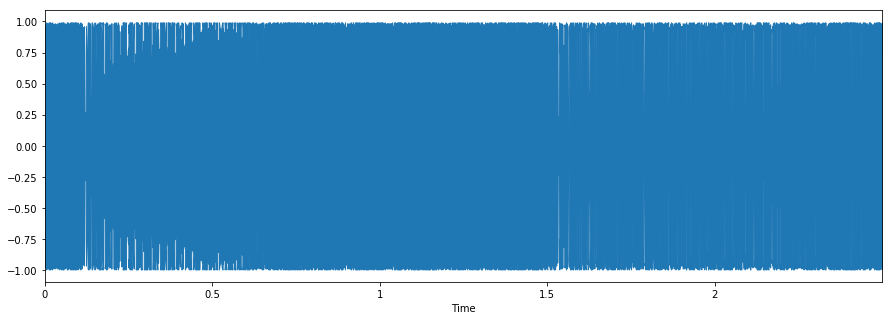

In [10]:
#Visualising Audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display


plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)  # plot the audio array

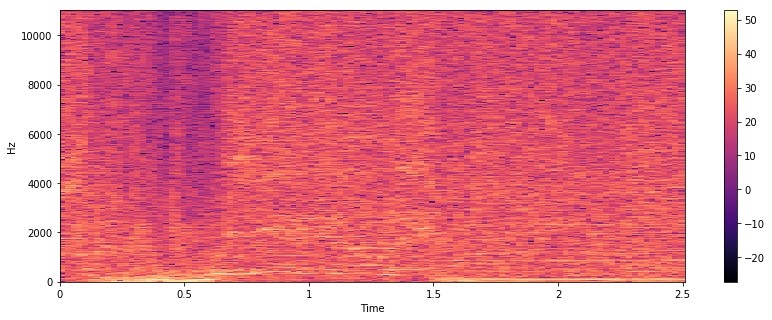

In [11]:
# creating spectogram of the audio
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

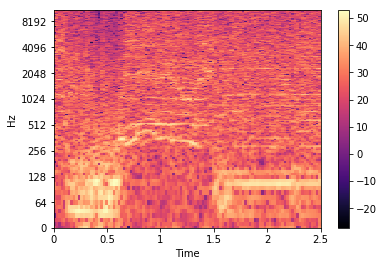

In [13]:
#Converting frequency axis to log of frequency
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [14]:
#writing in an audio file 
librosa.output.write_wav('example.wav', x, sr)


In [15]:
# Creating Audio Signal at 220hz
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

In [22]:
ipd.Audio('example.wav')


#### Zero Crossing Rate

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

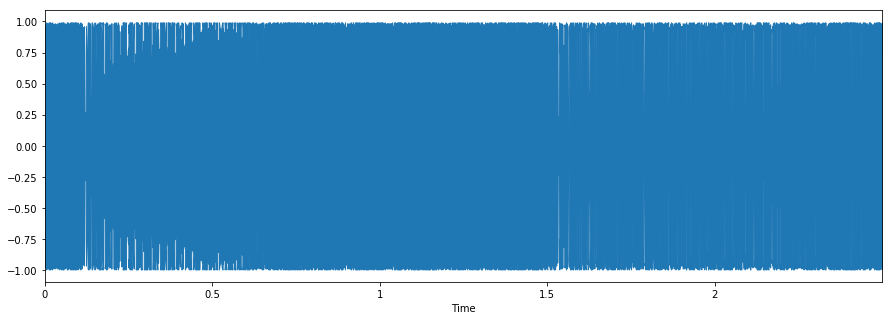

In [82]:
# Calculating Zero crossing Rate (can be used for  speech recognition and music information retrieval)

# Load the signal
x, sr = librosa.load('test.wav')
#Plot the signal:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)

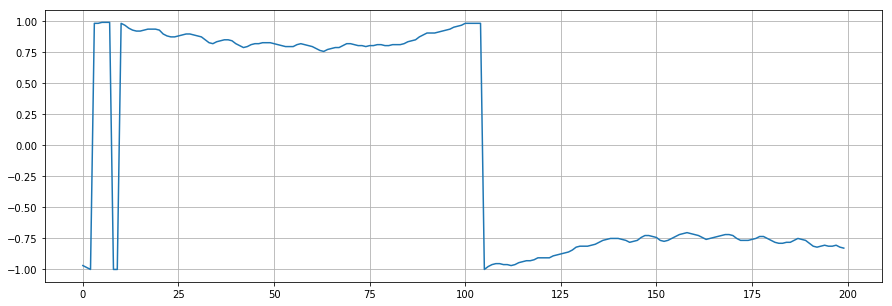

In [83]:
n0 = 9000
n1 = 9200
plt.figure(figsize=(15, 5))
plt.plot(x[n0:n1])
plt.grid()

In [84]:
#Verifying zero crossings with librosa
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

4


#### Spectral Centeroid 

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

(108,)


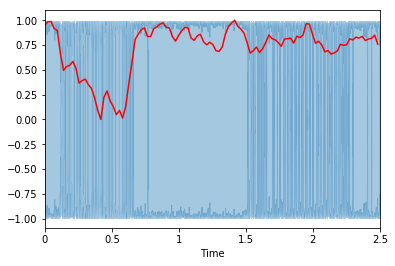

In [85]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape )


# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#### Spectral roll off
It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

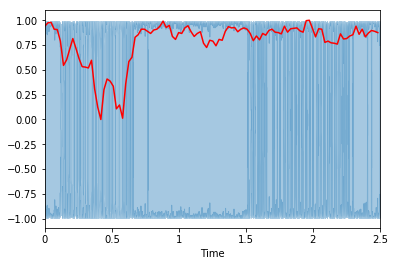

In [86]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

####  Mel frequency cepstral coefficients (MFCCs)
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

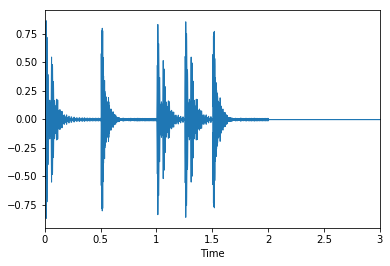

In [87]:
x, fs = librosa.load('simpleLoop.wav')
librosa.display.waveplot(x, sr=sr)

(20, 130)


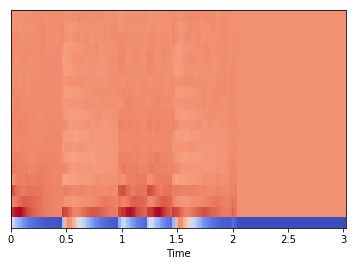

In [88]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# here 20 MFCC are computed over 130 frames

[ 3.71156097e-15 -2.73285668e-16  2.83533880e-16 -1.75927649e-16
  4.52629387e-17 -1.39204887e-16 -1.02909134e-16 -2.32719826e-16
 -9.17001517e-17 -1.78489702e-16  1.59274303e-16 -3.26234766e-16
  6.83214169e-17  1.36642834e-16 -1.92153985e-17 -8.11316826e-17
  5.12410627e-17 -3.05738341e-16 -7.85696294e-17 -5.29490981e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


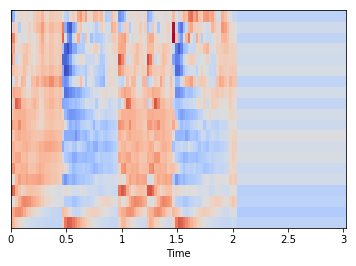

In [89]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
#scaling such that each coefficient dimension has zero mean and unit variance:

#### Chroma Frequency
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

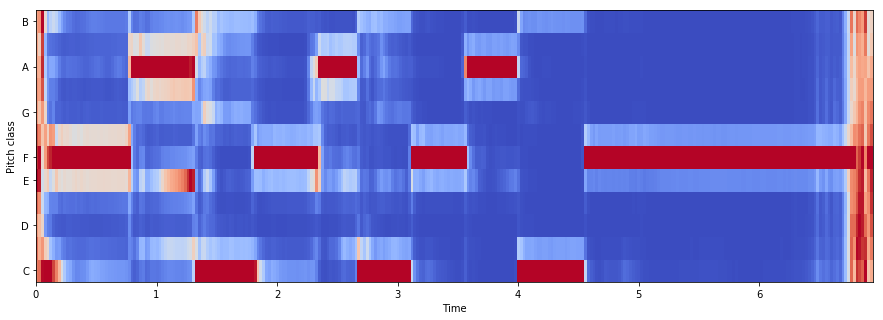

In [94]:
# Loadign the file
x, sr = librosa.load('simplePiano.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')